# Classification of motion imaging eeg signals based on wavelet transform and convolution neural network


## Data preprocessing


In [1]:
'''
MI_Wavelet_CNN
@zdl
reference paper:https://ieeexplore.ieee.org/document/8585027
DataSet BCI Competition III dataSet II 
MI task,binary classification 
x_train (1152,3,140)
x_test  (1152,3,140)
'''
import os
import pandas as pd
import shutil

# Define the folder path
folder_path = r'/workspaces/codespaces-jupyter/gesture-split'

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Extract the gesture number from the filename
        gesture_number = int(filename.split('Gesture')[1][0])
        
        # Create a folder for the gesture if it doesn't exist
        gesture_folder = os.path.join(folder_path, f'gesture_{gesture_number}')
        if not os.path.exists(gesture_folder):
            os.makedirs(gesture_folder)
        
        # Move the CSV file to the corresponding gesture folder
        destination_path = os.path.join(gesture_folder, filename)
        shutil.move(file_path, destination_path)

# Now, the CSV files are moved to their respective gesture folders.




In [2]:
import os
import pandas as pd

# Define the folder path
folder_path = r'/workspaces/codespaces-jupyter/gesture-split'

# Initialize a counter for naming DataFrames
counter = 1

# Iterate over the subfolders in the folder
for subfolder_name in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder_name)
    
    if os.path.isdir(subfolder_path):
        # Iterate over the files in the subfolder
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(subfolder_path, filename)
                
                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path)
                
                column_mapping = {col: f'channel_{i}' for i, col in enumerate(df.columns, start=1)}
                df.rename(columns=column_mapping, inplace=True)
             
                df_name = f'df{counter}'
                
                globals()[df_name] = df
                
                counter += 1


/tmp/ipykernel_40152/3897141794.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


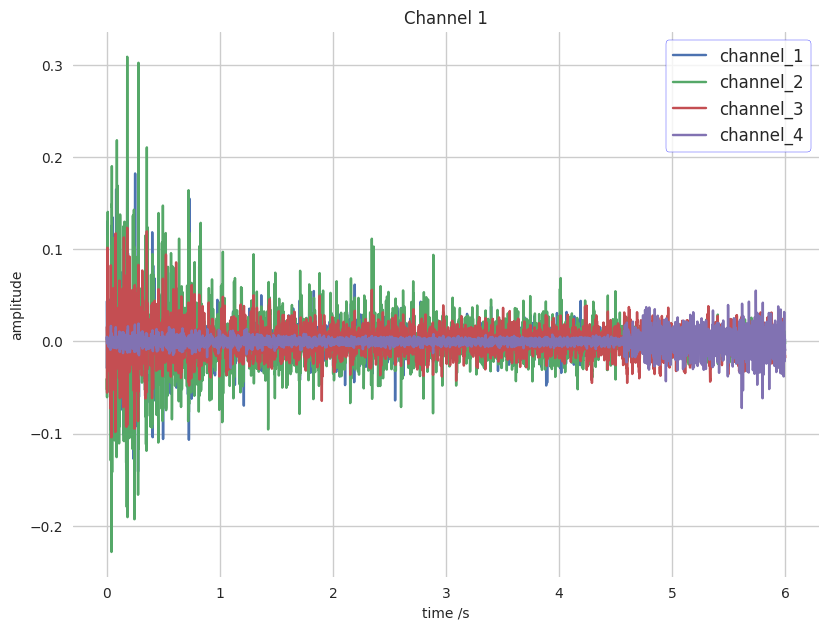

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_style("whitegrid")
# Define the sampling rate
sampleRate = 2000  # EEG sample rate

t = np.linspace(0, df1.shape[0] / sampleRate, df1.shape[0])

# Create a list of DataFrames
data_frames = [ df35  ]

plt.figure(figsize=(16, 12))


# Create subplots for each channel
for i, df in enumerate(data_frames, start=1):
    plt.subplot(2, 2, i)  # 2x2 grid of subplots
    for col in df.columns:
        plt.plot(t, df[col], label=col)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Channel {i}')
    plt.legend()

plt.tight_layout()  # Ensure proper layout of subplots
plt.xlabel('time /s')
plt.ylabel('amplitude')
plt.legend(loc='upper right',fontsize='large',frameon=True,edgecolor='blue') 
plt.show()  # Display the plot


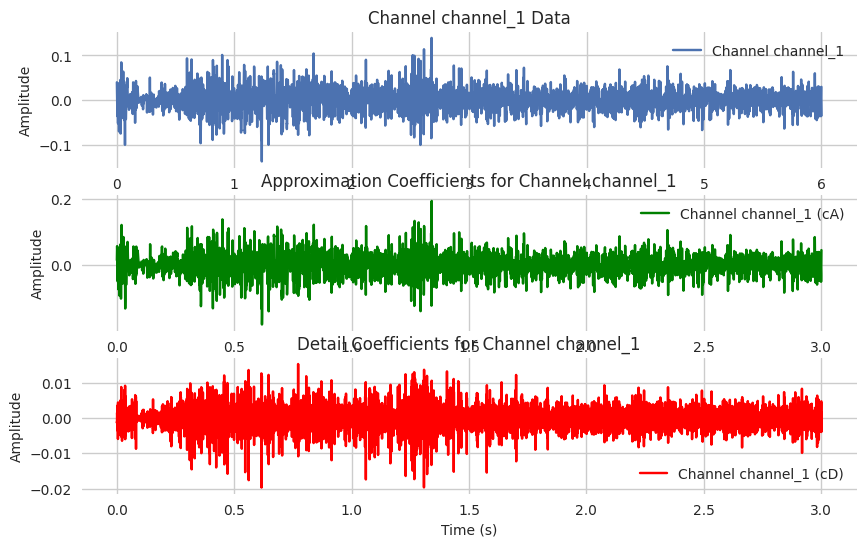

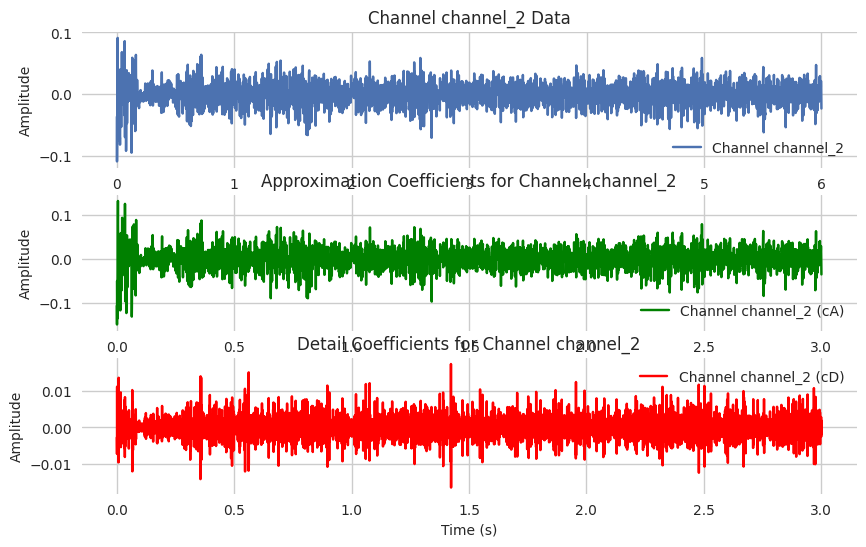

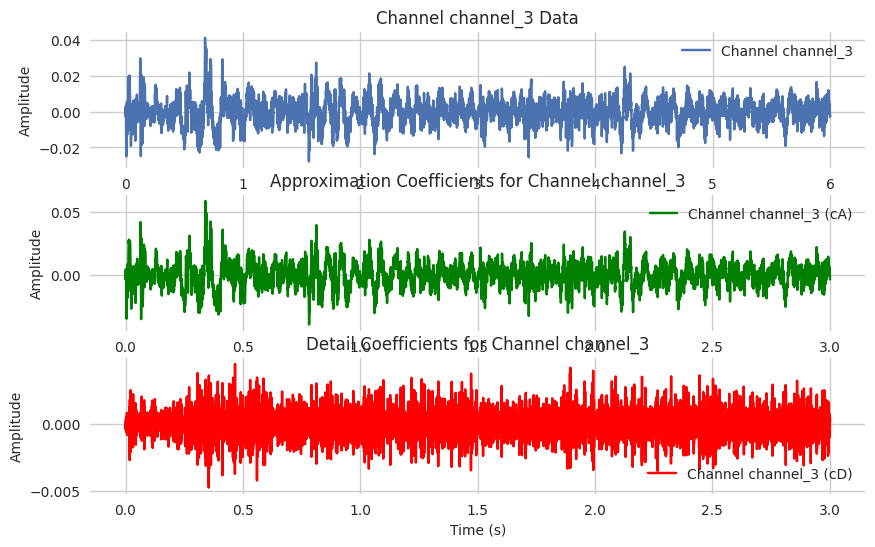

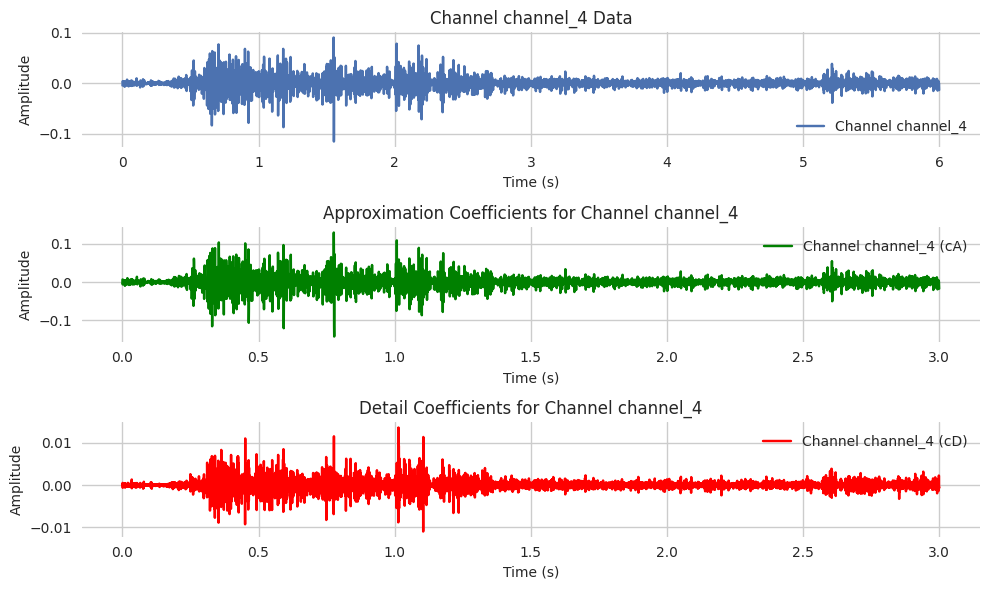

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [4]:
import pywt
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")


# Initialize a list to store the subplots
subplots = []

# Create subplots for each channel
for col in df2.columns:
    cA, cD = pywt.dwt(df2[col], 'db4')
    
    # Create a new figure for each channel
    plt.figure(figsize=(10, 6))
    
    # Plot the original channel data
    plt.subplot(3, 1, 1)
    plt.plot(t, df2[col], label=f'Channel {col}')
    plt.title(f'Channel {col} Data')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot the approximation coefficients (cA)
    plt.subplot(3, 1, 2)
    plt.plot(t[:len(cA)], cA, '-g', label=f'Channel {col} (cA)')
    plt.title(f'Approximation Coefficients for Channel {col}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot the detail coefficients (cD)
    plt.subplot(3, 1, 3)
    plt.plot(t[:len(cD)], cD, '-r', label=f'Channel {col} (cD)')
    plt.title(f'Detail Coefficients for Channel {col}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Store the subplot
    subplots.append(plt)

# Display all subplots
for subplot in subplots:
    subplot.tight_layout()
    subplot.show()


### Wavelet Transfrom


## Feature Extraction


In [13]:
df1947

NameError: name 'df1947' is not defined

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import pandas as pd

# Function to check if a folder exists
def folder_exists(folder_path):
    return os.path.exists(folder_path) and os.path.isdir(folder_path)

# Set the plotting style
plt.style.use('classic')

# Sampling rate
sampling_rate = 2000

# Define the repetition coefficients
rep_coefficients = [4, 138, 272, 406, 540]  # In seconds

# Wavelet parameters
wavename = 'morl'
totalscal = 1000
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Fixed folder path containing subfolders (gesture_0, gesture_1, etc.)
input_folder_path = '/workspaces/codespaces-jupyter/gesture-split'

# Create a directory to save the images
output_directory = 'gesture_split_images'
os.makedirs(output_directory, exist_ok=True)

# Iterate over subfolders (gesture_0, gesture_1, etc.) within the input folder
for gesture_folder_name in os.listdir(input_folder_path):
    gesture_folder_path = os.path.join(input_folder_path, gesture_folder_name)
    
    if not folder_exists(gesture_folder_path):
        continue  # Skip if it's not a folder
    
    # Create a subfolder in the output_directory
    output_subfolder = os.path.join(output_directory, gesture_folder_name)
    os.makedirs(output_subfolder, exist_ok=True)

    # Loop through each CSV file in the subfolder
    for csv_filename in os.listdir(gesture_folder_path):
        if csv_filename.endswith('.csv'):
            print(f"Processing {csv_filename}")  # Debugging statement
            
            csv_filepath = os.path.join(gesture_folder_path, csv_filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_filepath)
            
            # Use only the first column
            data = df.iloc[:, 0]
            
            # Loop through each repetition
            for rep in range(5):
                TimeStart = rep_coefficients[rep]
                TimeEnd = TimeStart + 6

                samplePointStart = int(TimeStart * sampling_rate)
                samplePointEnd = int(TimeEnd * sampling_rate)

                # Check if the data slice is empty
                if samplePointStart >= len(data) or samplePointEnd >= len(data):
                    continue
                
                # Adjust the time vector to match the number of columns in cwtmatr
                t = np.linspace(TimeStart, TimeEnd, samplePointEnd - samplePointStart)

                # Perform wavelet transform
                [cwtmatr, frequencies] = pywt.cwt(data.iloc[samplePointStart:samplePointEnd].values, scales, wavename, 1.0 / sampling_rate)

                # Create a single image for each repetition
                fig = plt.figure()
                plt.contourf(t, frequencies, abs(cwtmatr))
                plt.ylabel("Frequency (Hz)")
                plt.xlabel("Time (s)")
                plt.colorbar()
                plt.title(f'Wavelet Transform - {csv_filename}, Repetition {rep + 1}, Channel 1')

                filepath = os.path.join(output_subfolder, f'{csv_filename}_Channel_1_Rep_{rep + 1}.jpg')
                os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Create subdirectories as needed
                fig.savefig(filepath, bbox_inches='tight')
                plt.close()

print('Wavelet transform completed. Images are saved in the "gesture_split_images" folder.')


Processing Participant34_Rep0_Gesture2.csv
Processing Participant35_Rep4_Gesture2.csv
Processing Participant23_Rep1_Gesture2.csv
Processing Participant40_Rep4_Gesture2.csv
Processing Participant17_Rep4_Gesture2.csv
Processing Participant11_Rep4_Gesture2.csv
Processing Participant10_Rep3_Gesture2.csv
Processing Participant34_Rep4_Gesture2.csv
Processing Participant11_Rep3_Gesture2.csv
Processing Participant5_Rep3_Gesture2.csv
Processing Participant14_Rep3_Gesture2.csv
Processing Participant33_Rep0_Gesture2.csv
Processing Participant19_Rep2_Gesture2.csv
Processing Participant32_Rep3_Gesture2.csv
Processing Participant37_Rep4_Gesture2.csv
Processing Participant19_Rep4_Gesture2.csv
Processing Participant4_Rep3_Gesture2.csv
Processing Participant14_Rep0_Gesture2.csv
Processing Participant38_Rep1_Gesture2.csv
Processing Participant32_Rep1_Gesture2.csv
Processing Participant27_Rep1_Gesture2.csv
Processing Participant15_Rep2_Gesture2.csv
Processing Participant30_Rep1_Gesture2.csv
Processing Pa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import pandas as pd

# Function to check if a file exists in a folder
def file_exists_in_folder(folder_path, filename):
    return os.path.exists(os.path.join(folder_path, filename))

# Set the plotting style
plt.style.use('classic')

# Sampling rate
sampling_rate = 2000

# Wavelet parameters
wavename = 'morl'
totalscal = 1000
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Fixed folder path containing subfolders (gesture_0, gesture_1, etc.)
input_folder_path = '/workspaces/codespaces-jupyter/gesture-split'

# Create a directory to save the images
output_directory = 'gesture_split_images'
os.makedirs(output_directory, exist_ok=True)

# Iterate over subfolders (gesture_0, gesture_1, etc.) within the input folder
for gesture_folder_name in os.listdir(input_folder_path):
    gesture_folder_path = os.path.join(input_folder_path, gesture_folder_name)
    
    if not folder_exists(gesture_folder_path):
        continue  # Skip if it's not a folder
    
    # Create a subfolder in the output_directory
    output_subfolder = os.path.join(output_directory, gesture_folder_name)
    os.makedirs(output_subfolder, exist_ok=True)

    # Loop through each CSV file in the subfolder
    for csv_filename in os.listdir(gesture_folder_path):
        if csv_filename.endswith('.csv'):
            image_filename = f'{csv_filename}_Channel_1.jpg'
            image_filepath = os.path.join(output_subfolder, image_filename)
            
            # Check if the image file already exists in the output folder
            if file_exists_in_folder(output_subfolder, image_filename):
                print(f"Skipping {csv_filename}. Image already exists.")  # Debugging statement
                continue
            
            print(f"Processing {csv_filename}")  # Debugging statement
            
            csv_filepath = os.path.join(gesture_folder_path, csv_filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_filepath)
            
            # Use only the first column
            data = df.iloc[:, 0]
            
            # Perform wavelet transform
            [cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)

            # Create an image
            fig = plt.figure()
            plt.contourf(np.arange(len(data)) / sampling_rate, frequencies, abs(cwtmatr))
            plt.ylabel("Frequency (Hz)")
            plt.xlabel("Time (s)")
            plt.colorbar()
            plt.title(f'Wavelet Transform - {csv_filename}, Channel 1')

            filepath = os.path.join(output_subfolder, image_filename)
            os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Create subdirectories as needed
            fig.savefig(filepath, bbox_inches='tight')
            plt.close()

print('Wavelet transform completed. Images are saved in the "gesture_split_images" folder.')


# CNN model

- the network model is smaller with fewer convolutional layers
- one dimensional convolution kernel and two dimensional convolution kernel are used
- innovatively add batch normalized processing data BN
- Keras built the network

## train dataset description

- X_Train train data 280 samples
- Y_Train train label


## CNN Classification


In [29]:
import os
import numpy as np
import tensorflow as tf

def get_file(directory):
    dataTrain = []
    labelTrain = []

    # Mapping from folder name to label (assuming folder names are integers)
    label_mapping = {}

    # Iterate over the subdirectories inside the directory
    for label, subdir in enumerate(sorted(os.listdir(directory))):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            label_mapping[subdir] = label

            # Iterate over the JPG files inside the subdirectory
            for file in os.listdir(subdir_path):
                if file.endswith('.jpg'):
                    dataTrain.append(os.path.join(subdir_path, file))
                    labelTrain.append(label)

    temp = np.array([dataTrain, labelTrain])
    temp = np.transpose(temp)
    np.random.shuffle(temp)
    image_list = temp[:, 0]
    label_list = temp[:, 1]
    label_list = [int(i) for i in label_list]
    return image_list, label_list

# Specify the directory you want to work with (current directory)
current_directory = os.getcwd()
folder_name = 'feature-extraction-images'
folder_path = os.path.join(current_directory, folder_name)

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    image_list, label_list = get_file(folder_path)
else:
    print(f"The folder '{folder_name}' does not exist in the current directory.")


In [61]:
import os
import numpy as np
import tensorflow as tf

def get_file(directory):
    dataTrain = []
    labelTrain = []
    label_mapping = {}  # Map labels to unique integers
    label_counter = 0

    # Iterate over the JPG files directly in the directory
    for file in os.listdir(directory):
        if file.endswith('.jpg'):
            dataTrain.append(os.path.join(directory, file))
            # Extract labels from the filename
            filename_parts = file.split('_')
            if len(filename_parts) == 5 and filename_parts[0]==('Channel') and filename_parts[2] == ('Rep'):
                channel_number = filename_parts[1]
                repetition_number = filename_parts[3]
                label = f'Channel_{channel_number}_Rep_{repetition_number}'
                
                # Check if the label is already in the mapping
                if label not in label_mapping:
                    label_mapping[label] = label_counter
                    label_counter += 1

                labelTrain.append(label_mapping[label])

    if not dataTrain:
        print("No JPG image files found in the specified directory.")
        return np.array([]), np.array([])  # Return empty arrays
    else:
        return np.array(dataTrain), np.array(labelTrain, dtype=np.int32)

# Specify the directory you want to work with (current directory)
current_directory = os.getcwd()
folder_name = 'feature-extraction-images'
folder_path = os.path.join(current_directory, folder_name)

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    image_list, label_list = get_file(folder_path)
else:
    print(f"The folder '{folder_name}' does not exist in the current directory or is not accessible.")


In [72]:
import os
import numpy as np
import tensorflow as tf
import re

def get_file(directory):
    dataTrain = []
    labelTrain = []
    label_mapping = {}  # Map labels to unique integers
    label_counter = 0

    # Regular expression pattern for matching filenames
    pattern = r'Channel_(\d+)_Rep_(\d+)'

    # Iterate over the JPG files directly in the directory
    for file in os.listdir(directory):
        if file.endswith('.jpg'):
            dataTrain.append(os.path.join(directory, file))

            # Extract labels using regular expression
            match = re.search(pattern, file)
            if match:
                channel_number = match.group(1)
                repetition_number = match.group(2)
                label = f'Channel_{channel_number}_Rep_{repetition_number}'

                # Check if the label is already in the mapping
                if label not in label_mapping:
                    label_mapping[label] = label_counter
                    label_counter += 1

                labelTrain.append(label_mapping[label])

    if not dataTrain:
        print("No JPG image files found in the specified directory.")
        return np.array([]), np.array([])  # Return empty arrays
    else:
        return np.array(dataTrain), np.array(labelTrain, dtype=np.int32)

# Specify the directory you want to work with (current directory)
current_directory = os.getcwd()
folder_name = 'feature-extraction-images'
folder_path = os.path.join(current_directory, folder_name)

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    image_list, label_list = get_file(folder_path)
else:
    print(f"The folder '{folder_name}' does not exist in the current directory or is not accessible.")


In [73]:
label_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

(570, 707, 3)


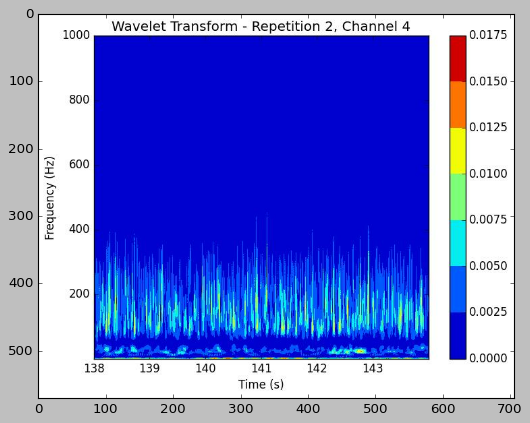

In [74]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Read binary data
image_raw = tf.io.gfile.GFile(image_list[10], 'rb').read()

# Decode the image using tf.image.decode_jpeg
img = tf.image.decode_jpeg(image_raw)  # Tensor

# Start a TensorFlow session to evaluate the image
with tf.compat.v1.Session() as sess:  # For TensorFlow 2.x, you can omit tf.compat.v1
    img_ = img.numpy()  # Equivalent to sess.run(img)
    print(img_.shape)

# Display the image using matplotlib
plt.figure(1)
plt.imshow(img_)
plt.show()


In [77]:
# read train data  figure-->tensor
# read_file 
# decode_jpeg
X = np.empty([280,64,64,3])
with tf.compat.v1.Session() as sess:
    for i in range(len(image_list)):
        # 读取图像文件
        image_raw_data = tf.io.gfile.GFile(image_list[i],'rb').read() 
        # 将图像文件解码为tensor
        image_data = tf.image.decode_jpeg(image_raw_data)
        # 改变张量的形状
        resized = tf.image.resize(image_data, [64,64])  
        resized = np.asarray(resized.eval(),dtype='uint8')      # asarray 生成数组 深拷贝不复制对象   .eval()等价于 sess.run(resized)
        X[i,:,:,:]=resized  

# train data
X_Train = X[:,:,:,:]
Y = np.subtract(np.array(label_list), 1)
Y = Y.reshape([280,1])
V = tf.one_hot(Y, depth=2,axis=1,dtype=tf.float32)
session = tf.compat.v1.Session()
Y_Train = session.run(V)
session.close()
# resize
Y_Train = Y_Train.reshape([280,2])
#  normalization
X_Train = X_Train/255.
print ("X_Train shape: " + str(X_Train.shape))
print ("Y_Train shape: " + str(Y_Train.shape))

AttributeError: Tensor.graph is undefined when eager execution is enabled.

In [79]:
tf.compat.v1.disable_eager_execution()

X = np.empty([len(image_list), 64, 64, 3])

with tf.compat.v1.Session() as sess:
    for i, image_path in enumerate(image_list):
        # Read image file
        image_raw_data = tf.io.gfile.GFile(image_path, 'rb').read()

        # Decode image as tensor
        image_data = tf.image.decode_jpeg(image_raw_data)

        # Resize tensor
        resized = tf.image.resize(image_data, [64, 64])

        # Evaluate and convert to NumPy array
        resized = np.asarray(resized.eval(), dtype='uint8')

        X[i, :, :, :] = resized

# Prepare training data
X_Train = X / 255.0  # Normalize pixel values to [0, 1]

# Encode labels as one-hot vectors
num_classes = len(np.unique(label_list))
Y = np.subtract(label_list, 1)
Y_Train = tf.one_hot(Y, depth=num_classes, axis=1, dtype=tf.float32)

# Start a TensorFlow session
with tf.compat.v1.Session() as session:
    Y_Train = session.run(Y_Train)

print("X_Train shape:", X_Train.shape)
print("Y_Train shape:", Y_Train.shape)

X_Train shape: (20, 64, 64, 3)
Y_Train shape: (20, 20)


In [84]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D

input_shape = X_Train.shape[1:]
num_classes = 2

model = Sequential()

model.add(Conv2D(16, (4, 4), padding='same', input_shape=input_shape, kernel_initializer='he_normal', name='conv2d_1'))
model.add(Activation('relu', name='activation_1'))
model.add(MaxPooling2D(pool_size=(8, 8), name='maxpool2d_1'))
model.add(Dropout(0.25, name='dropout_1'))

model.add(Conv2D(32, (4, 4), padding='same', kernel_initializer='he_normal', name='conv2d_2'))
model.add(Activation('relu', name='activation_2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool2d_2'))
model.add(Dropout(0.25, name='dropout_2'))

model.add(Flatten(name='flatten_1'))
model.add(Dense(240, kernel_initializer='he_normal', name='dense_1'))
model.add(Activation('relu', name='activation_3'))
model.add(Dropout(0.5, name='dropout_3'))
model.add(Dense(num_classes, kernel_initializer='he_normal', name='dense_2'))
model.add(Activation('softmax', name='activation_4'))
model.summary()

# Optimizer
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0003, decay=1e-6)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        784       
                                                                 
 activation_1 (Activation)   (None, 64, 64, 16)        0         
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 8, 8, 16)          0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          8224      
                                                                 
 activation_2 (Activation)   (None, 8, 8, 32)          0         
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 4, 4, 32)         

In [85]:
# train model
epochs = 300
history = model.fit(X_Train, Y_Train, shuffle=True, batch_size=8, epochs=epochs, verbose=1, validation_split=0.3)

ValueError: A target array with shape (20, 20) was passed for an output of shape (None, 2) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [ ]:

# cross validation
'''
#learning_rate = 0.01,num_epochs = 500, minibatch_size = 16
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(X,b)
print(skf)
for train_index,test_index in skf.split(X,b):
    #print("Train Index:",train_index,",Test Index:",test_index)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=Y[train_index],Y[test_index]
    
    X_train = X_train/255.
    X_test = X_test/255.
    print ("number of training examples = " + str(X_train.shape[0]))
    print ("number of test examples = " + str(X_test.shape[0]))
#     print ("X_train shape: " + str(X_train.shape))
#     print ("Y_train shape: " + str(y_train.shape))
#     print ("X_test shape: " + str(X_test.shape))
#     print ("Y_test shape: " + str(y_test.shape))
    
    _, _, parameters = model(X_train, y_train, X_test, y_test)
    
    
    with open('2003.pkl','rb') as f:
            pred=pickle.load(f)
            
    true=np.argmax(y_test,1)+1
    confusion_matrix(true,pred)
    print(classification_report(true,pred))
'''


'#交叉验证\n#learning_rate = 0.01,num_epochs = 500, minibatch_size = 16\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.metrics import confusion_matrix, classification_report\nskf=StratifiedKFold(n_splits=5)\nskf.get_n_splits(X,b)\nprint(skf)\nfor train_index,test_index in skf.split(X,b):\n    #print("Train Index:",train_index,",Test Index:",test_index)\n    X_train,X_test=X[train_index],X[test_index]\n    y_train,y_test=Y[train_index],Y[test_index]\n    \n    X_train = X_train/255.\n    X_test = X_test/255.\n    print ("number of training examples = " + str(X_train.shape[0]))\n    print ("number of test examples = " + str(X_test.shape[0]))\n#     print ("X_train shape: " + str(X_train.shape))\n#     print ("Y_train shape: " + str(y_train.shape))\n#     print ("X_test shape: " + str(X_test.shape))\n#     print ("Y_test shape: " + str(y_test.shape))\n    \n    _, _, parameters = model(X_train, y_train, X_test, y_test)\n    \n    \n    with open(\'2003.pkl\',\'rb\') as f:\

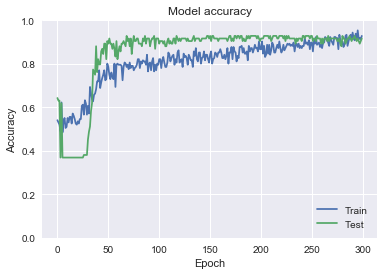

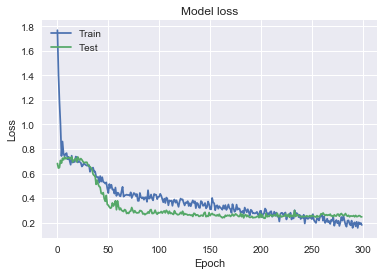

In [ ]:
#  Visualization of training process
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim(0,1)

plt.figure(1)
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

